In [2]:
#!pip install openeo
#!pip install rasterio

In [1]:

import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import openeo

Conectarse al API usando los datos de usuario y contraseña

In [2]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [30]:
#Areas de interes
lago_atitlan = {
    "west": -91.349,
    "east": -91.0702,
    "south": 14.5971,
    "north": 14.7648
}
lago_amatitlan = {
    "west": -90.66,
    "east": -90.58,
    "south": 14.43,
    "north": 14.51
}

Cargando las coordeanadas de Guatemala

In [31]:
atitlan_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=lago_atitlan,  # Región de Guatemala
    temporal_extent=["2025-08-01", "2025-08-05"],  # Usa fechas pasadas, no futuras
    bands=["B02","B03","B04", "B08"]
)

In [32]:
connection

<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

Descargar la imagen

In [33]:
result_graph = atitlan_cube.save_result(format="GTIFF")
job = connection.create_job(result_graph)
job.start_and_wait()
job.download_results("imgs/Bandas_Atitlan.tiff")

0:00:00 Job 'j-2508111849344b5d8121e6320c3982ba': send 'start'
0:00:13 Job 'j-2508111849344b5d8121e6320c3982ba': created (progress 0%)
0:00:18 Job 'j-2508111849344b5d8121e6320c3982ba': created (progress 0%)
0:00:25 Job 'j-2508111849344b5d8121e6320c3982ba': created (progress 0%)
0:00:33 Job 'j-2508111849344b5d8121e6320c3982ba': queued (progress 0%)
0:00:43 Job 'j-2508111849344b5d8121e6320c3982ba': queued (progress 0%)
0:00:56 Job 'j-2508111849344b5d8121e6320c3982ba': queued (progress 0%)
0:01:11 Job 'j-2508111849344b5d8121e6320c3982ba': queued (progress 0%)
0:01:31 Job 'j-2508111849344b5d8121e6320c3982ba': queued (progress 0%)
0:01:55 Job 'j-2508111849344b5d8121e6320c3982ba': queued (progress 0%)
0:02:25 Job 'j-2508111849344b5d8121e6320c3982ba': queued (progress 0%)
0:03:03 Job 'j-2508111849344b5d8121e6320c3982ba': queued (progress 0%)
0:03:50 Job 'j-2508111849344b5d8121e6320c3982ba': running (progress N/A)
0:04:48 Job 'j-2508111849344b5d8121e6320c3982ba': running (progress N/A)
0:05:48

/var/folders/9q/tfydcr6d56x3ht8bfg6vfx240000gn/T/ipykernel_7336/854197083.py:4: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results("imgs/Bandas_Atitlan.tiff")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openeo/rest/job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openeo/rest/job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


{PosixPath('imgs/Bandas_Atitlan.tiff'): {'bands': [{'eo:center_wavelength': 0.4924,
    'eo:common_name': 'blue',
    'name': 'B02'},
   {'eo:center_wavelength': 0.5598, 'eo:common_name': 'green', 'name': 'B03'},
   {'eo:center_wavelength': 0.6646, 'eo:common_name': 'red', 'name': 'B04'},
   {'eo:center_wavelength': 0.8328, 'eo:common_name': 'nir', 'name': 'B08'}],
  'eo:bands': [{'center_wavelength': 0.4924,
    'common_name': 'blue',
    'name': 'B02'},
   {'center_wavelength': 0.5598, 'common_name': 'green', 'name': 'B03'},
   {'center_wavelength': 0.6646, 'common_name': 'red', 'name': 'B04'},
   {'center_wavelength': 0.8328, 'common_name': 'nir', 'name': 'B08'}],
  'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/jobs/j-2508111849344b5d8121e6320c3982ba/results/assets/Nzg1YTQ3ODktMThmNy00NjQwLWFlNjItMGIwY2E4NjhiMmFk/7c7e71d56990d6bbce62a7ba96ee78b3/openEO_2025-08-04Z.tif?expires=1755543384',
  'proj:bbox': [677700, 1614410, 707890, 1633210],
  'proj:epsg': 32615,
  'proj:s

Visualizar lo descargado

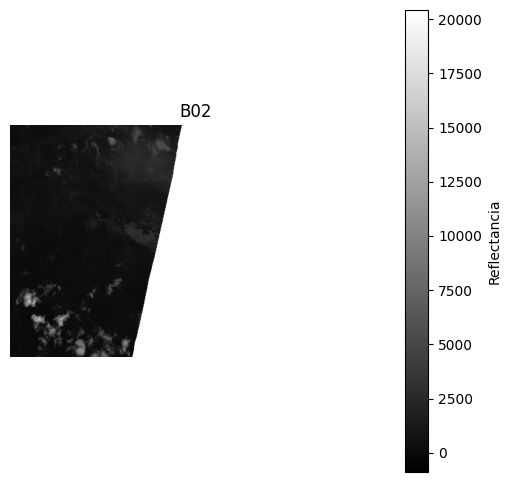

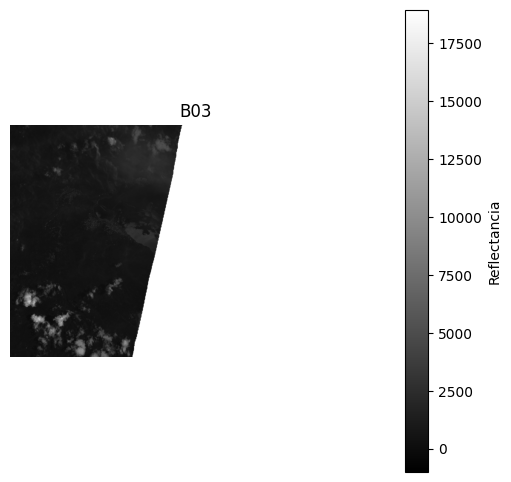

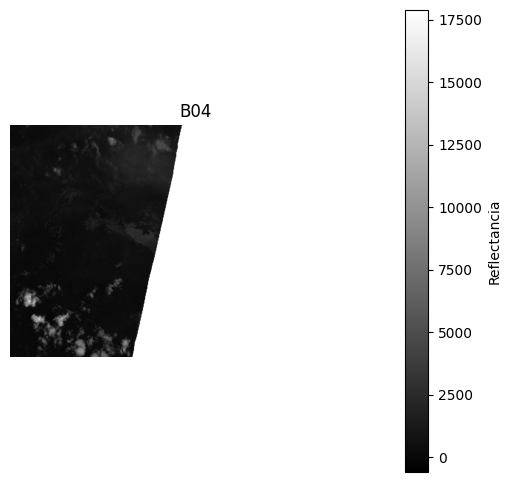

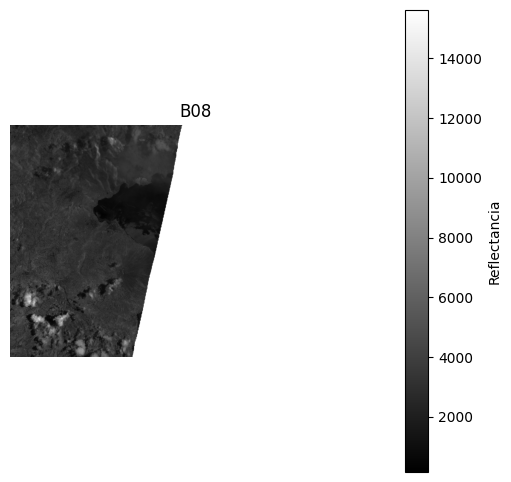

In [34]:
ruta_tif = "imgs/Bandas_Atitlan.tiff"

with rasterio.open(ruta_tif) as src:
    bandas = src.read()  # Lee todas las bandas
    nombres = src.descriptions if src.descriptions[0] else [f"Banda {i+1}" for i in range(src.count)]
    nodata = src.nodata

# Visualizar bandas individuales
for i in range(bandas.shape[0]):
    plt.figure(figsize=(6, 6))
    img = bandas[i]
    img = np.ma.masked_where(img == nodata, img)
    plt.imshow(img, cmap='gray')
    plt.title(f"{nombres[i]}")
    plt.axis('off')
    plt.colorbar(label="Reflectancia")
    plt.show()

In [37]:
nodata,nombres, bandas

(-32768.0,
 ('B02', 'B03', 'B04', 'B08'),
 array([[[   380,    340,    284, ..., -32768, -32768, -32768],
         [   407,    418,    279, ..., -32768, -32768, -32768],
         [   439,    344,    259, ..., -32768, -32768, -32768],
         ...,
         [    96,    114,     59, ..., -32768, -32768, -32768],
         [    65,    137,     90, ..., -32768, -32768, -32768],
         [    84,     81,     62, ..., -32768, -32768, -32768]],
 
        [[   516,    528,    500, ..., -32768, -32768, -32768],
         [   538,    501,    458, ..., -32768, -32768, -32768],
         [   539,    426,    449, ..., -32768, -32768, -32768],
         ...,
         [   358,    420,    378, ..., -32768, -32768, -32768],
         [   310,    441,    344, ..., -32768, -32768, -32768],
         [   250,    358,    400, ..., -32768, -32768, -32768]],
 
        [[   597,    447,    332, ..., -32768, -32768, -32768],
         [   696,    582,    325, ..., -32768, -32768, -32768],
         [   761,    536,   

Mostrar en falso color

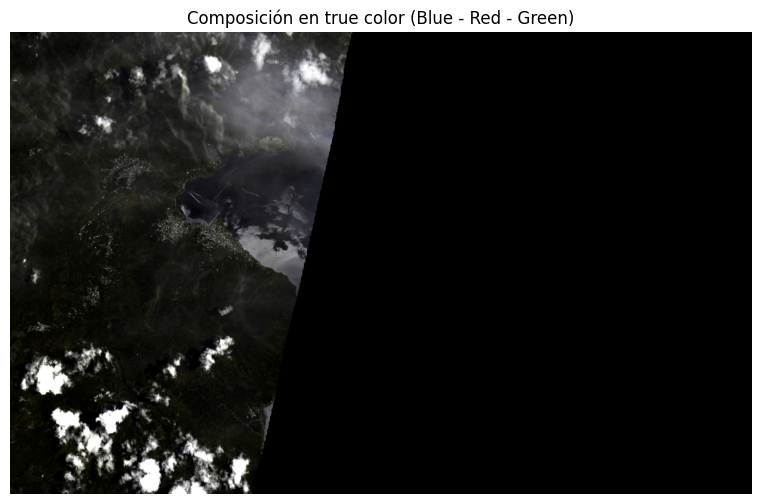

In [40]:
# Normalizador
def normalize(b):
    b_min, b_max = np.percentile(b[b > 0], (2, 98))
    return np.clip((b - b_min) / (b_max - b_min), 0, 1)

blue = bandas[0]   #B02
green = bandas[1]  # B03
red = bandas[1]    # B04
nir = bandas[2]    # B08

# Reasignar correctamente:
b = normalize(blue)  # B02
g = normalize(green)    # B03
r = normalize(red)    # B04
n = normalize(blue)    # B08

# Falso color (NIR NearInfrared, Red, Green)
rgb = np.dstack([r, g, b])

plt.figure(figsize=(10, 6))
plt.imshow(rgb)
plt.title("Composición en true color (Blue - Red - Green)")
plt.axis('off')
plt.show()


## NDVI

Calcule el índice de diferencia normalizada para el lago de Atitlán. Recuerde que usando Sentinel-2 se calcula usando las siguiente fórmula:<br>

NDVI (Sentinel 2) = (B8 – B4) / (B8 + B4)

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir a float32 y escalar a reflectancia (0–1)
red_scale = red.astype(np.float32) / 10000  # B04
nir_scale = nir.astype(np.float32) / 10000  # B08
green_scale = green.astype(np.float32) / 10000  # B03
blue_scale = blue.astype(np.float32) / 10000  # B02

# Calcular NDVI
ndvi_atitlan = np.where(
    (nir_scale + red_scale) == 0,
    0,
    (nir_scale - red_scale) / (nir_scale + red_scale)
)

ndvi_atitlan


/var/folders/9q/tfydcr6d56x3ht8bfg6vfx240000gn/T/ipykernel_7336/3227356534.py:14: RuntimeWarning: divide by zero encountered in divide
  (nir_scale - red_scale) / (nir_scale + red_scale)


array([[ 0.07277627, -0.08307692, -0.20192309, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.12803888,  0.07479227, -0.16985954, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.17076923,  0.11434512, -0.26836157, ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.29475588, -0.352657  , -0.4566474 , ..., -0.        ,
        -0.        , -0.        ],
       [-0.302521  , -0.34862387, -0.3815261 , ..., -0.        ,
        -0.        , -0.        ],
       [-0.28534707, -0.34333956, -0.41093475, ..., -0.        ,
        -0.        , -0.        ]], dtype=float32)

### Visualizar NDVI

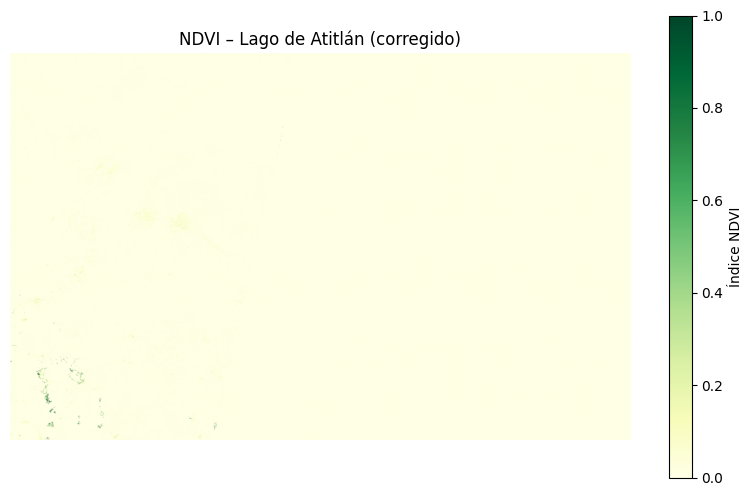

In [47]:
# Mostrar NDVI
plt.figure(figsize=(10, 6))
plt.imshow(ndvi_atitlan, cmap='YlGn', vmin=0, vmax=1)
plt.title("NDVI – Lago de Atitlán (corregido)")
plt.colorbar(label="Índice NDVI")
plt.axis('off')
plt.show()

| NDVI          | Interpretación                                |
| ------------- | --------------------------------------------- |
| **0.6 a 1.0** | Vegetación muy densa y sana                   |
| **0.4 a 0.6** | Vegetación saludable (cultivos, bosques)      |
| **0.2 a 0.4** | Vegetación escasa o en estrés                 |
| **0.0 a 0.2** | Suelo desnudo, hierba seca                    |
| **< 0.0**     | Agua, nubes, nieve o superficies artificiales |


## NDWI
Calcule el índice de agua de diferencia normalizada (NDWI). Recuerde que se calcula usando la siguiente fórmula: <br>
NDWI (Sentinel 2) = (B3 – B8) / (B3 + B8)

In [48]:


ndwi_atitlan = np.where(
    (green + nir) == 0,
    0,
    (green - nir) / (green + nir)
)
ndwi_atitlan

/var/folders/9q/tfydcr6d56x3ht8bfg6vfx240000gn/T/ipykernel_7336/531908303.py:4: RuntimeWarning: divide by zero encountered in divide
  (green - nir) / (green + nir)
/var/folders/9q/tfydcr6d56x3ht8bfg6vfx240000gn/T/ipykernel_7336/531908303.py:4: RuntimeWarning: invalid value encountered in divide
  (green - nir) / (green + nir)


array([[-0.07277628,  0.08307692,  0.20192308, ...,  0.        ,
         0.        ,  0.        ],
       [-0.1280389 , -0.07479224,  0.16985951, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17076923, -0.11434511,  0.26836158, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.29475588,  0.352657  ,  0.4566474 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30252101,  0.34862385,  0.3815261 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28534704,  0.34333959,  0.41093474, ...,  0.        ,
         0.        ,  0.        ]])

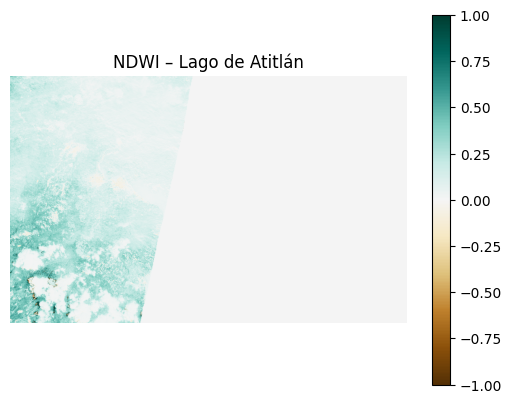

In [49]:
plt.imshow(ndwi_atitlan, cmap='BrBG', vmin=-1, vmax=1)
plt.title("NDWI – Lago de Atitlán")
plt.colorbar()
plt.axis('off')
plt.show()

| NDWI        | Interpretación                       |
| ----------- | ------------------------------------ |
| **> 0.2**   | Agua o zonas húmedas                 |
| **0 a 0.2** | Vegetación poco densa o suelo húmedo |
| **< 0**     | Vegetación o suelo seco              |


## Ejercicios:

1. Muestre el mapa en true color del lago de Amatitlan.  
2. Calcule los índices NDVI y NDWI para el lago de amatitlán y muestre los mapas.  
3. Discuta semejanzas y diferencias sobre los índices en ambos lagos